In [10]:
import pandas as pd
import seaborn as sns

iris = pd.read_csv("../data/iris.csv")

In [44]:
iris["variety"].value_counts()

Setosa        50
Virginica     50
Versicolor    50
Name: variety, dtype: int64

In [45]:
iris["variety"].map({"Setosa": 0, "Virginica": 1, "Versicolor": 2})

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: variety, Length: 150, dtype: int64

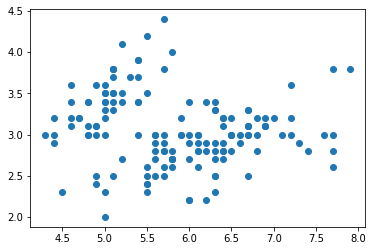

In [33]:
import matplotlib.pyplot as plt

plt.scatter(iris["sepal.length"], iris["sepal.width"]);

In [43]:
from sklearn.cluster import KMeans

X = iris.drop(columns="variety")

for k in [2, 3, 4, 5, 6]:
    km = KMeans(n_clusters=k)
    km.fit(X)
    print(km.inertia_)

247.63174868702592
78.851441426146
59.34876557610241
46.985061122661115
39.57886631746632


In [42]:
km.inertia_

78.851441426146

In [20]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [25]:
df = pd.DataFrame(km.cluster_centers_, columns=X.columns)
df

,sepal.length,sepal.width,petal.length,petal.width
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


In [26]:
df_long = df.unstack().reset_index()
df_long

,level_0,level_1,0
0,sepal.length,0,5.901613
1,sepal.length,1,5.006000
2,sepal.length,2,6.850000
3,sepal.width,0,2.748387
4,sepal.width,1,3.428000
5,sepal.width,2,3.073684
6,petal.length,0,4.393548
7,petal.length,1,1.462000
8,petal.length,2,5.742105
9,petal.width,0,1.433871


In [28]:
import plotly.express as px

px.line_polar(df_long, r=0, theta="level_0", color="level_1", line_close=True)

In [35]:
iris["label"] = km.labels_

In [41]:
iris.groupby("label").agg(["mean", "std", "max", "min"])

sepal.length                     sepal.width                      \
              mean       std  max  min        mean       std  max  min   
label                                                                    
0         5.901613  0.466410  7.0  4.9    2.748387  0.296284  3.4  2.0   
1         5.006000  0.352490  5.8  4.3    3.428000  0.379064  4.4  2.3   
2         6.850000  0.494155  7.9  6.1    3.073684  0.290092  3.8  2.5   

      petal.length                     petal.width                      
              mean       std  max  min        mean       std  max  min  
label                                                                   
0         4.393548  0.508895  5.1  3.0    1.433871  0.297500  2.4  1.0  
1         1.462000  0.173664  1.9  1.0    0.246000  0.105386  0.6  0.1  
2         5.742105  0.488590  6.9  4.9    2.071053  0.279872  2.5  1.4